In [26]:
# Import iris from sklearn

from sklearn import datasets
import numpy as np

# Load the iris dataset
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target


In [27]:
# create dataframe
import pandas as pd
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names) 
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [28]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.20, random_state=3256)

In [29]:
print(iris_df.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 5) (120, 4) (30, 4) (120,) (30,)


In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_mod1 = LogisticRegression()
log_mod1.fit(X_train, y_train)
y_pred = log_mod1.predict(X_test)

In [31]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [32]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 10]])

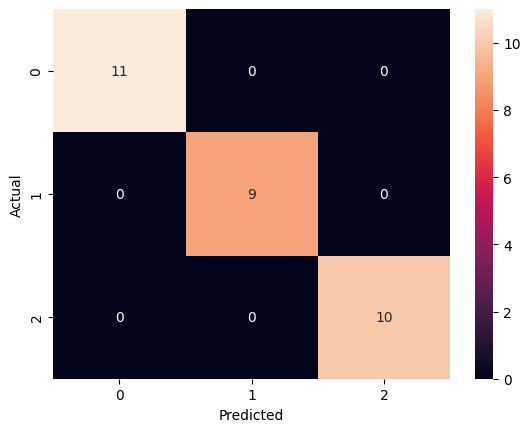

In [33]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
# Clustering using KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_data[:, 0:4])
# kmeans.labels_
iris_df['kmeans'] = kmeans.labels_
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,kmeans
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

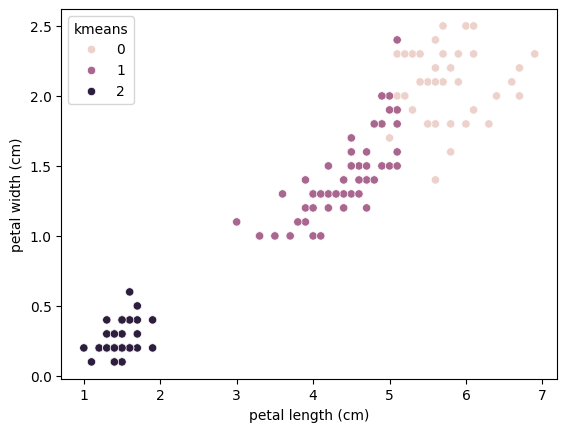

In [ ]:
# Plot of kmeans clustering

sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='kmeans', data=iris_df)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

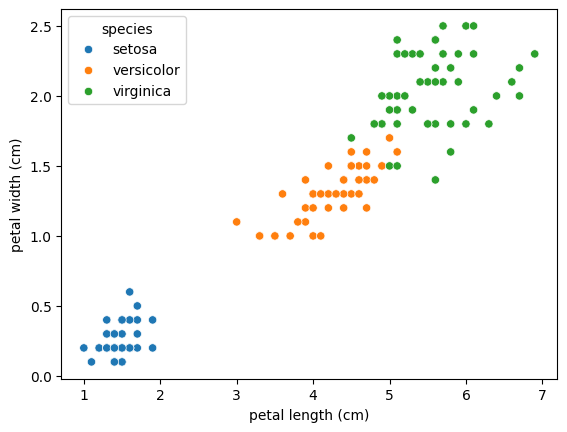

In [38]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=iris_df)

#